In [19]:
import requests

In [20]:
url = "https://services.sentinel-hub.com/ogc/wms/b7b5e3ef-5a40-4e2a-9fd3-75ca2b81cb32?SERVICE=WMS&REQUEST=GetMap&MAXCC=20&LAYERS=1-NATURAL-COLOR&EVALSOURCE=S2&WIDTH=1286&HEIGHT=557&FORMAT=image/jpeg&NICENAME=Sentinel-2+image+on+2019-01-11.jpg&TIME=2018-07-01/2019-01-11&BBOX=-439415,4913596,-391030,4934884"

In [21]:
url

'https://services.sentinel-hub.com/ogc/wms/b7b5e3ef-5a40-4e2a-9fd3-75ca2b81cb32?SERVICE=WMS&REQUEST=GetMap&MAXCC=20&LAYERS=1-NATURAL-COLOR&EVALSOURCE=S2&WIDTH=1286&HEIGHT=557&FORMAT=image/jpeg&NICENAME=Sentinel-2+image+on+2019-01-11.jpg&TIME=2018-07-01/2019-01-11&BBOX=-439415,4913596,-391030,4934884'

In [22]:
r = requests.get(url)

In [23]:
with open("1.png", "wb") as code:
        code.write(r.content)

In [24]:
import matplotlib.pyplot as plt

In [25]:
import cartopy.crs as ccrs

In [26]:
def coordenadasVentana (x,y,offset):
    """
    ==========================================================================================
    Funcion que obtiene las coordenadas extremas, tanto del TIFF temporal para la extracción 
    de datos como el requerido para el mapeo
    ==========================================================================================
    """    
    print ('Obteniendo coordenadas ventana...')    

    # Obtiene las coordenadas extremas de la ventana de acuerdo al offset
    urlon= x + offset
    lllon = x - offset        
      
    urlat = y + offset
    lllat = y - offset
        
    return lllon,lllat,urlon,urlat

In [27]:
from pyproj import Proj, transform

In [28]:
lllon,lllat,urlon,urlat = coordenadasVentana (-99,19,10)

Obteniendo coordenadas ventana...


In [29]:
lllon,lllat,urlon,urlat

(-109, 9, -89, 29)

In [30]:
lllonMer,lllatMer = transform(Proj(init='epsg:4326'), Proj(init='epsg:3857'), lllon, lllat)  
urlonMer,urlatMer = transform(Proj(init='epsg:4326'), Proj(init='epsg:3857'), urlon, urlat)

In [31]:
lllonMer,lllatMer

(-12133824.49646682, 1006021.0627551326)

In [32]:

url = 'https://services.sentinel-hub.com/ogc/wms/b7b5e3ef-5a40-4e2a-9fd3-75ca2b81cb32?SERVICE=WMS&REQUEST=GetMap&MAXCC=20&LAYERS=1-NATURAL-COLOR&EVALSOURCE=S2&WIDTH=1286&HEIGHT=557&FORMAT=image/jpeg&NICENAME=Sentinel-2+image+on+2019-01-11.jpg&TIME=2018-07-01/2019-01-11&BBOX='+str(lllonMer)+','+str(lllatMer)+','+str(urlonMer)+','+str(urlatMer)

In [33]:
url

'https://services.sentinel-hub.com/ogc/wms/b7b5e3ef-5a40-4e2a-9fd3-75ca2b81cb32?SERVICE=WMS&REQUEST=GetMap&MAXCC=20&LAYERS=1-NATURAL-COLOR&EVALSOURCE=S2&WIDTH=1286&HEIGHT=557&FORMAT=image/jpeg&NICENAME=Sentinel-2+image+on+2019-01-11.jpg&TIME=2018-07-01/2019-01-11&BBOX=-12133824.49646682,1006021.0627551326,-9907434.680601347,3375646.03491931'

In [34]:
r = requests.get(url)

In [35]:
with open("3.jpg", "wb") as code:
        code.write(r.content)

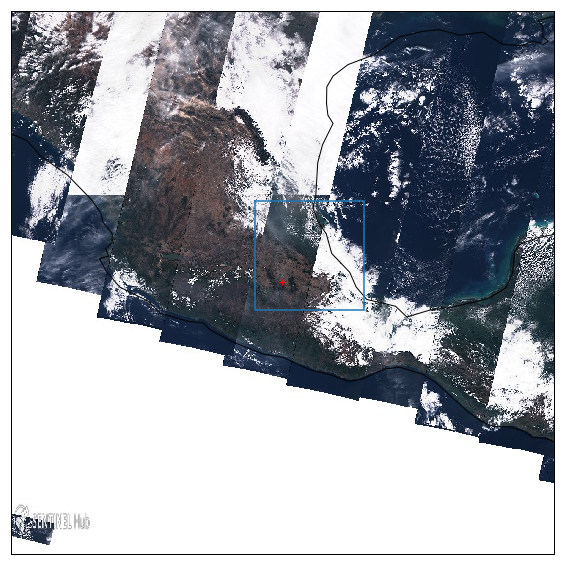

In [38]:
from shapely.geometry import Polygon
po = Polygon([(-100,22),(-100,18),(-96,18),(-96,22)])

plt.figure(figsize=(10,10))
ax = plt.axes(projection=ccrs.LambertCylindrical(central_longitude=0.0))
ax.coastlines()
#ax.set_global()
plt.plot(-99,19,'r+')
plt.plot(po.exterior.xy[0],po.exterior.xy[1])
img = plt.imread('3.jpg')
plt.imshow(img,extent=(lllon,urlon,lllat,urlat),transform=ccrs.LambertCylindrical(central_longitude=0.0))
plt.savefig('final.png')